# Исследование надежности заемщиков

### Описание проекта
<B>Заказчик:</B> кредитный отдел банка.<BR>
<B>Цель исследования:</B> Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. <BR>
<B>Входные данные от банка:</B> Статистика о платёжеспособности клиентов.<BR>
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Шаг 1. Обзор данных

### Загрузка и получение общей информации о таблице

In [1]:
import pandas as pd # импорт библиотеки pandas

In [2]:
df = pd.read_csv('/datasets/data.csv') # чтение файла с данными и сохранение в df
df.head(10) # получение первых 10 строк таблицы df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [3]:
df.info() # получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Итак, в таблице 12 столбцов. 

Согласно документации к данным:
* children — количество детей в семье
* days_employed — общий трудовой стаж в днях
* dob_years — возраст клиента в годах
* education — уровень образования клиента
* education_id — идентификатор уровня образования
* family_status — семейное положение
* family_status_id — идентификатор семейного положения
* gender — пол клиента
* income_type — тип занятости
* debt — имел ли задолженность по возврату кредитов
* total_income — ежемесячный доход
* purpose — цель получения кредита

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

## Шаг 2. Предобработка данных

### Шаг 2.1 Заполнение пропусков

In [4]:
df.isna().sum() # подсчёт пропусков

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Судя по тому, что количество значений в столбцах days_employed и total_income совпадают, причиной пропусков является отсутствие информации в этих полях для не работающих.
Проверим это, если пропущены значения одновременно в обоих столбцах, то скорее всего это так.

In [5]:
test = df.dropna(subset=['days_employed']) # удаляем строки, только если значения отсутствуют в столбце 'days_employed'
test.isna().sum() # если исчезнут и пропуски в 'total_income', значит, строки действительно содержат информацию про не работающих

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

In [6]:
df.loc[df['total_income'].isna()].sample(10) # посмотрим, как выглядят пропуски

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
15123,1,NaN,28,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,на покупку подержанного автомобиля
14566,0,NaN,29,высшее,0,Не женат / не замужем,4,F,компаньон,0,NaN,покупка жилья
2655,1,NaN,44,среднее,1,женат / замужем,0,F,компаньон,0,NaN,недвижимость
6973,2,NaN,31,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,покупка недвижимости
15327,0,NaN,29,среднее,1,женат / замужем,0,M,компаньон,0,NaN,операции со своей недвижимостью
17908,1,NaN,36,неоконченное высшее,2,женат / замужем,0,M,сотрудник,0,NaN,покупка жилья для семьи
6510,0,NaN,42,среднее,1,Не женат / не замужем,4,M,сотрудник,0,NaN,жилье
2052,0,NaN,58,среднее,1,гражданский брак,1,F,пенсионер,0,NaN,сыграть свадьбу
19290,0,NaN,41,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,профильное образование
11950,0,NaN,58,среднее,1,гражданский брак,1,M,сотрудник,0,NaN,на проведение свадьбы


По этой выборке похоже, что клиенты без информации о времени работы и доходе — либо действительно неработающие (пенсионер), либо сотрудники (или компаний клиентов, или самого банка). Без стабильного дохода им, скорее всего, не дали бы кредит, поэтому для сохранения полноты данных есть смысл заполнить значения времени работы и дохода медианными значениями по таблице.<BR>
<FONT COLOR = RED>Сделаем это после исправления аномалий</FONT>

In [7]:
df[df['total_income'].isna()].pivot_table(index='income_type', values='debt', aggfunc=['count']) # Посчитаем количество клиентов
                                                                                                 # без сведений о размере дохода

,count
,debt
income_type,
госслужащий,147
компаньон,508
пенсионер,413
предприниматель,1
сотрудник,1105


In [8]:
df.pivot_table(index='income_type', values='debt', aggfunc=['count']) # Общее число клиентов

,count
,debt
income_type,
безработный,2
в декрете,1
госслужащий,1459
компаньон,5085
пенсионер,3856
предприниматель,2
сотрудник,11119
студент,1


Мы подсчитали количество клиентов по типам занятости. Видно, что в выделенные нами категории "спецклиентов" попадает около 10% клиентов с данными типами занятости. Гипотезе, о том, что это клиенты, о которых банк распологает дополнительной информацией о доходах, не внесенной в исходные данные, результат проверки не противоречит.

### Шаг 2.2 Проверка данных на аномалии и исправления.

In [9]:
df.describe() # посмотрим на статистические параметры таблицы

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


Видно, что в столбцах 'children' и 'days_employed' находятся отрицательные значения, не имеющие физического смысла. Возможно, это вызвано опечаткой при внесении данных вручную. 

In [10]:
df['days_employed'][df['days_employed'] < 0].count() # посмотрим число аномальных значений в столбце 'days_employed'

15906

Учитывая большое количество аномалий, отсутствие связи с поставленной задачей и невозможность уточнения информации у заказчика, удалим столбец 'days_employed'.

In [11]:
df = df.drop('days_employed', axis=1)  # удалим столбец 'days_employed'
df.head()

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [12]:
df['children'][df['children'] < 0].count() # посмотрим число аномальных значений в столбце 'children'

47

Число аномалий невелико. Не имея возможности уточнить у заказчика, примем версию, что минус — ошибка ручного ввода и заменим знак в отрицательных значениях детей. 

In [13]:
df['children'] = df['children'].abs() # берем все значения количества детей по модулю

In [14]:
df['children'].describe() # смотрим статистические параметры столбца 'children' после замены

count    21525.000000
mean         0.543275
std          1.379876
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         20.000000
Name: children, dtype: float64

In [15]:
df['children'].value_counts()

0     14149
1      4865
2      2055
3       330
20       76
4        41
5         9
Name: children, dtype: int64

20 детей могут быть и усыновленными, а банк часто дает кредиты таким семьям в порядке социальной помощи. Но 76 случаев, это слишком много. Скорее всего это выброс и его стоит заменить медианой.

Значение 20 в числе детей похоже на ошибку. Учитывая небольшое количество таких значений, можно заменить их медианой.

In [16]:
df.loc[df['children'] == 20, 'children'] = df['children'].median() # Заменим выбросы в числе детей медианой

In [17]:
df['children'].value_counts() # Подсчитаем количество детей после замены

0.0    14225
1.0     4865
2.0     2055
3.0      330
4.0       41
5.0        9
Name: children, dtype: int64

Теперь в статистических параметрах числа детей не заметны явные аномалии.

In [18]:
df['dob_years'].value_counts() # Проверим значения столбца'dob_years'

35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

В данных есть строки с нулевым возрастом. Очевидно ошибка. Заполним значения медианой.

In [19]:
df.loc[df['dob_years'] == 0, 'dob_years'] = df['dob_years'].median()

In [20]:
df['dob_years'].value_counts()

42.0    698
35.0    617
40.0    609
41.0    607
34.0    603
38.0    598
33.0    581
39.0    573
31.0    560
36.0    555
44.0    547
29.0    545
30.0    540
48.0    538
37.0    537
50.0    514
43.0    513
32.0    510
49.0    508
28.0    503
45.0    497
27.0    493
56.0    487
52.0    484
47.0    480
54.0    479
46.0    475
58.0    461
57.0    460
53.0    459
51.0    448
59.0    444
55.0    443
26.0    408
60.0    377
25.0    357
61.0    355
62.0    352
63.0    269
64.0    265
24.0    264
23.0    254
65.0    194
66.0    183
22.0    183
67.0    167
21.0    111
68.0     99
69.0     85
70.0     65
71.0     58
20.0     51
72.0     33
19.0     14
73.0      8
74.0      6
75.0      1
Name: dob_years, dtype: int64

Аномальные значения возраста устранены.

Поскольку в значениях дохода аномалий не найдено, можно заменить пропуски медианными значениями по таблице.

In [21]:
df['total_income'] = df['total_income'].fillna(df['total_income'].median()) # заполняем пропуски столбца 'total_income' медианным значением
df.isna().sum() # подсчёт пропусков

children            0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

Пропуски устранены

### Шаг 2.3. Изменение типов данных.

In [22]:
df.info() # получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  float64
 1   dob_years         21525 non-null  float64
 2   education         21525 non-null  object 
 3   education_id      21525 non-null  int64  
 4   family_status     21525 non-null  object 
 5   family_status_id  21525 non-null  int64  
 6   gender            21525 non-null  object 
 7   income_type       21525 non-null  object 
 8   debt              21525 non-null  int64  
 9   total_income      21525 non-null  float64
 10  purpose           21525 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 1.8+ MB


Столбец 'total_income', содержащий ежемесячный доход, имеет вещественный тип, характер данных позволяет без значительного ущерба изменить его на целочисленный. 

In [23]:
try:
    df['total_income'] = df['total_income'].astype('int') # преобразуем в целочисленный тип
except:
    print('Ошибка преобразования типа данных')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  float64
 1   dob_years         21525 non-null  float64
 2   education         21525 non-null  object 
 3   education_id      21525 non-null  int64  
 4   family_status     21525 non-null  object 
 5   family_status_id  21525 non-null  int64  
 6   gender            21525 non-null  object 
 7   income_type       21525 non-null  object 
 8   debt              21525 non-null  int64  
 9   total_income      21525 non-null  int64  
 10  purpose           21525 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 1.8+ MB


Тип данных успешно преобразован

### Шаг 2.4. Удаление дубликатов.

In [24]:
dupes = df.duplicated()  # ищем явные дубликаты
dupes.sum() # смотрим количество явных дубликатов

55

In [25]:
df[dupes].sample(10)  # смотрим на дубликаты

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10697,0.0,40.0,среднее,1,гражданский брак,1,F,компаньон,0,145017,сыграть свадьбу
12373,0.0,58.0,среднее,1,женат / замужем,0,M,сотрудник,0,145017,покупка недвижимости
8583,0.0,58.0,высшее,0,Не женат / не замужем,4,F,пенсионер,0,145017,дополнительное образование
20165,0.0,42.0,среднее,1,женат / замужем,0,F,сотрудник,0,145017,покупка жилья для семьи
14832,0.0,50.0,среднее,1,Не женат / не замужем,4,F,сотрудник,0,145017,недвижимость
9627,0.0,56.0,среднее,1,женат / замужем,0,F,пенсионер,0,145017,операции со своей недвижимостью
18755,0.0,58.0,среднее,1,женат / замужем,0,F,пенсионер,0,145017,заняться образованием
9528,0.0,66.0,среднее,1,вдовец / вдова,2,F,пенсионер,0,145017,операции со своей недвижимостью
15012,0.0,42.0,среднее,1,гражданский брак,1,F,сотрудник,0,145017,на проведение свадьбы
20702,0.0,64.0,среднее,1,женат / замужем,0,F,пенсионер,0,145017,дополнительное образование


Отсутствие уникального ID клиента ставит вопрос, вызвано ли дублирование ошибкой, или у разных клиентов действительно совпадают приведенные в параметрах данные. Ухудшает ситуацию, что в выборке видно, что доход, который помог бы различить клиентов, заполнен нами медианным значением. Но, поскольку количество дубликатов невелико, и совпадение других данных (возраст, количество детей) снижает вероятность того, что это разные клиенты, удалим повторяющиеся строки.

In [26]:
df = df.drop_duplicates().reset_index(drop=True) # удаляем повторяющиеся строки
df.shape # смотрим сколько строк в таблице после удаления

(21470, 11)

Найдем неявные дубликаты

In [27]:
df['education'].value_counts() # смотрим все варианты значений в столбце 'education'

среднее                13704
высшее                  4710
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   273
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64

Есть совпадающие категории, которые могут быть унифицированы изменением регистра.

In [28]:
df['education']=df['education'].str.lower() # делаем все категории в столбце 'education' small case
df['education'].value_counts() # смотрим все варианты значений в столбце 'education'

среднее                15187
высшее                  5251
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

Неявные дубликаты в столбце 'education' устранены

In [29]:
df['family_status'].value_counts() # смотрим все варианты значений в столбце 'family_status'

женат / замужем          12344
гражданский брак          4162
Не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64

Дубликатов нет

In [30]:
df['income_type'].value_counts() # смотрим все варианты значений в столбце 'income_type'

сотрудник          11090
компаньон           5080
пенсионер           3837
госслужащий         1457
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64

Дубликатов нет

In [31]:
df['purpose'].value_counts() # смотрим все варианты значений в столбце 'purpose'

свадьба                                   793
на проведение свадьбы                     772
сыграть свадьбу                           769
операции с недвижимостью                  675
покупка коммерческой недвижимости         662
операции с жильем                         652
покупка жилья для сдачи                   652
операции с коммерческой недвижимостью     650
жилье                                     646
покупка жилья                             646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          625
покупка недвижимости                      621
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

Похоже, что есть дубликаты, например варианты со свадьбой. Лучше уточнить у заказчика, но, в отсутствии такой возможности, попробуем устранить самые очевидные дубликаты.

In [32]:
def replace_dupes(dupes, replacement): # Функция для замены неявных дубликатов
    for dupe in dupes:
        df['purpose'] = df['purpose'].replace(dupe, replacement)

In [33]:
replace_dupes(['свадьба', 'сыграть свадьбу'],'на проведение свадьбы') # заменяем синонимы
replace_dupes(['заняться образованием', 'образование'],'получение образования')
replace_dupes(['заняться высшим образованием', 'высшее образование'],'получение высшего образования')
replace_dupes(['автомобиль', 'автомобили', 'свой автомобиль', 'приобретение автомобиля', 'на покупку своего автомобиля'],'на покупку автомобиля')
replace_dupes(['покупка своего жилья', 'покупка жилья для семьи', 'жилье'],'покупка жилья')

In [34]:
df['purpose'].value_counts() # смотрим все варианты значений в столбце 'purpose'

на покупку автомобиля                     2889
покупка жилья                             2550
на проведение свадьбы                     2334
получение высшего образования             1374
получение образования                     1297
операции с недвижимостью                   675
покупка коммерческой недвижимости          662
операции с жильем                          652
покупка жилья для сдачи                    652
операции с коммерческой недвижимостью      650
строительство собственной недвижимости     635
недвижимость                               633
операции со своей недвижимостью            627
строительство жилой недвижимости           625
покупка недвижимости                       621
строительство недвижимости                 619
ремонт жилью                               607
покупка жилой недвижимости                 606
сделка с подержанным автомобилем           486
на покупку подержанного автомобиля         478
дополнительное образование                 460
сделка с авто

Число категорий сокращено. Дальнейшее сокращение, может привести к утрате важной информации.

В результате явные дубликаты найдены и удалены методами <CODE>.duplicated() .drop_duplicates()</CODE>, как самым простым способом.<BR>
Неявные дубликаты искались визуально, по спискам <CODE>.value_counts()</CODE>, так как такого качества обработки достаточно для решения задачи.<BR>
Появление явных дубликатов возможно вызвано технической ошибкой.<BR>
Появление неявных дубликтов возможно вызвано человеческим фактором. Скорее всего данные вводились вручную и получались из разных источников.

### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

Создадим два новых датафрейма, в которых:
* каждому уникальному значению из education соответствует уникальное значение education_id — в первом;
* каждому уникальному значению из family_status соответствует уникальное значение family_status_id — во втором.

In [38]:
education_dict = df[['education','education_id']] # скопируем столбцы 'education','education_id' и удалим дубликаты
education_dict = education_dict.drop_duplicates().reset_index(drop=True)
print(education_dict) # для создания словаря education_dict

             education  education_id
0               высшее             0
1              среднее             1
2  неоконченное высшее             2
3            начальное             3
4       ученая степень             4


In [39]:
family_dict = df[['family_status', 'family_status_id']] # скопируем столбцы 'family_status', 'family_status_id' и удалим дубликаты
family_dict = family_dict.drop_duplicates().reset_index(drop=True)
print(family_dict) # для создания словаря family_dict

           family_status  family_status_id
0        женат / замужем                 0
1       гражданский брак                 1
2         вдовец / вдова                 2
3              в разводе                 3
4  Не женат / не замужем                 4


In [40]:
df = df.drop(['education', 'family_status'], axis=1) # удалим столбцы education и family_status, оставив только их идентификаторы
df.head(5)

,children,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1.0,42.0,0,0,F,сотрудник,0,253875,покупка жилья
1,1.0,36.0,1,0,F,сотрудник,0,112080,на покупку автомобиля
2,0.0,33.0,1,0,M,сотрудник,0,145885,покупка жилья
3,3.0,32.0,1,0,M,сотрудник,0,267628,дополнительное образование
4,0.0,53.0,1,1,F,пенсионер,0,158616,на проведение свадьбы


### Шаг 2.6. Категоризация дохода.

На основании диапазонов, указанных ниже, создадим столбец total_income_category с категориями:
* 0–30000 — 'E';
* 30001–50000 — 'D';
* 50001–200000 — 'C';
* 200001–1000000 — 'B';
* 1000001 и выше — 'A'.

In [41]:
def income_category(income): # Возвращает категорию дохода, используя правила приведенные выше

    if income <= 30000:
        return 'E'
    if income <= 50000:
        return 'D'
    if income <= 200000:
        return 'C'
    if income <= 1000000:
        return 'B'
    return 'A' 

In [42]:
df['total_income_category'] = df['total_income'].apply(income_category) #создадим столбец с категориями по доходу
df.sample(10)

,children,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
9881,2.0,46.0,1,0,M,сотрудник,0,482919,операции со своей недвижимостью,B
19277,0.0,49.0,1,0,M,сотрудник,0,145017,строительство недвижимости,C
13072,1.0,54.0,0,3,F,компаньон,0,1128836,операции с недвижимостью,A
3909,0.0,47.0,0,0,M,сотрудник,0,101595,сделка с автомобилем,C
2637,1.0,39.0,1,0,M,сотрудник,0,162405,покупка жилья,C
412,2.0,40.0,1,1,F,компаньон,0,91603,на проведение свадьбы,C
14559,0.0,67.0,1,0,M,пенсионер,0,296644,на покупку автомобиля,B
10743,0.0,47.0,1,0,F,сотрудник,0,85596,операции с коммерческой недвижимостью,C
1161,1.0,36.0,0,0,F,сотрудник,0,203866,дополнительное образование,B
1714,0.0,32.0,2,0,F,компаньон,0,140898,получение высшего образования,C


### Шаг 2.7. Категоризация целей кредита.

На основании данных из столбца purpose сформируем новый столбец purpose_category, в который войдут следующие категории:
* 'операции с автомобилем',
*  'операции с недвижимостью',
*  'проведение свадьбы',
*  'получение образования'.

In [43]:
df['purpose'].value_counts() # смотрим возможные значения целей

на покупку автомобиля                     2889
покупка жилья                             2550
на проведение свадьбы                     2334
получение высшего образования             1374
получение образования                     1297
операции с недвижимостью                   675
покупка коммерческой недвижимости          662
операции с жильем                          652
покупка жилья для сдачи                    652
операции с коммерческой недвижимостью      650
строительство собственной недвижимости     635
недвижимость                               633
операции со своей недвижимостью            627
строительство жилой недвижимости           625
покупка недвижимости                       621
строительство недвижимости                 619
ремонт жилью                               607
покупка жилой недвижимости                 606
сделка с подержанным автомобилем           486
на покупку подержанного автомобиля         478
дополнительное образование                 460
сделка с авто

In [44]:
def purpose_category(purpose): # Возвращает категорию дохода, используя правила приведенные выше

    if 'автом' in purpose:
        return 'операции с автомобилем'
    if ('жил' in purpose) or ('недви' in purpose):
        return 'операции с недвижимостью'
    if 'свад' in purpose:
        return 'проведение свадьбы'
    if 'образ' in purpose:
        return 'получение образования'

In [45]:
df['purpose_category'] = df['purpose'].apply(purpose_category) #создадим столбец с категориями по доходу
df.sample(10)

,children,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
7906,1.0,64.0,1,1,M,пенсионер,0,79422,на проведение свадьбы,C,проведение свадьбы
18128,0.0,61.0,1,0,F,пенсионер,0,91889,недвижимость,C,операции с недвижимостью
11022,0.0,70.0,1,0,F,пенсионер,0,86417,получение высшего образования,C,получение образования
18447,0.0,47.0,0,2,F,госслужащий,0,253503,получение образования,B,получение образования
18894,0.0,57.0,1,4,F,сотрудник,0,120191,получение образования,C,получение образования
8861,2.0,48.0,1,0,M,сотрудник,0,84510,получение образования,C,получение образования
14047,1.0,36.0,1,0,F,сотрудник,0,145017,получение высшего образования,C,получение образования
17105,1.0,50.0,0,0,M,сотрудник,0,215290,операции с коммерческой недвижимостью,B,операции с недвижимостью
3809,0.0,44.0,1,0,M,сотрудник,0,191219,операции с недвижимостью,C,операции с недвижимостью
11372,1.0,54.0,0,3,F,компаньон,0,239183,покупка жилья,B,операции с недвижимостью


### Шаг 2.8 Выводы по предобработке данных

1. В столбцах `days_employed` и `total_income` есть пропуски, которые совпадают по столбцам. Похоже, что клиенты без информации о времени работы и доходе — либо неработающие (пенсионер), либо сотрудники (или компаний клиентов, или самого банка). Поскольку без стабильного дохода им, скорее всего, не дали бы кредит, для сохранения полноты данных пропущенные значения заполнены медианными значениями по таблице.
2. В столбцах `children` и `days_employed` найдены отрицательные значения, не имеющие физического смысла. Возможно, это вызвано опечаткой при внесении данных вручную. 
    - Учитывая большое количество аномалий, отсутствие связи с поставленной задачей и невозможность уточнения информации у заказчика столбец `days_employed` удален.
    - Число аномалий в столбцах 'children' невелико. Не имея возможности уточнить у заказчика, мы предположили, что минус — ошибка ручного ввода и заменили знак в отрицательных значениях детей. Также в этом столбце найдено несколько значений `20`. Это похоже на ошибку. Учитывая небольшое количество таких значений, они были заменены медианой.
3. В столбце `dob_years` есть строки с нулевым возрастом. Очевидно это ошибка. Нулевые значения заполнены медианой.
4. Столбец `total_income`, содержащий ежемесячный доход, имеет вещественный тип, характер данных позволяет без значительного ущерба изменить его на целочисленный, что и было сделано.
5. Отсутствие уникального ID клиента вызвало проблемы с поиском явных дубликатов. Не ясно, вызвано ли дублирование ошибкой, или у разных клиентов действительно совпадают приведенные в параметрах данные. Ухудшает ситуацию, что в выборке видно, что доход, который помог бы различить клиентов, заполнен нами медианным значением. Но, поскольку количество дубликатов невелико, и совпадение других данных (возраст, количество детей) снижает вероятность того, что это разные клиенты, повторяющиеся строки были удалены.
6. В столбце `education` есть совпадающие категории, которые нами унифицированы изменением регистра.
7. Созданы два новых датафрейма, в которых каждому уникальному значению из `education` соответствует уникальное значение `education_id` — в первом; и каждому уникальному значению из `family_status` соответствует уникальное значение `family_status_id` — во втором.
8.  С целью категоризация дохода и целей кредита созданы столбцы `total_income_category` и `purpose_category` с соответствующими категориями.

### Ответы на вопросы.

#### Вопрос 1: Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [46]:
debt_pivot = df.pivot_table(index=['children'],  values='debt', aggfunc=['sum','count'])
debt_pivot

,sum,count
,debt,debt
children,,
0.0,1071,14182
1.0,445,4856
2.0,194,2052
3.0,27,330
4.0,4,41
5.0,0,9


In [47]:
debt_per_cat1 = df.pivot_table(index=['children'],  values='debt', aggfunc=['sum', 'count']) # таблица с количеством должников и 
                                                                               # общим количеством детей по числу детей в семье
debt_per_cat1 = debt_per_cat1.set_axis(['debtors', 'count'], axis=1, inplace=False) # переименовываем столбцы
debt_per_cat1['debt_ratio'] = debt_per_cat1['debtors'] / debt_per_cat1['count'] # считаем соотношение должников и общего числа
                                                                               # клиентов с данным количеством детей
debt_per_cat1

,debtors,count,debt_ratio
children,,,
0.0,1071,14182,0.075518
1.0,445,4856,0.091639
2.0,194,2052,0.094542
3.0,27,330,0.081818
4.0,4,41,0.097561
5.0,0,9,0.000000


<AxesSubplot:xlabel='количество детей', ylabel='доля должников'>

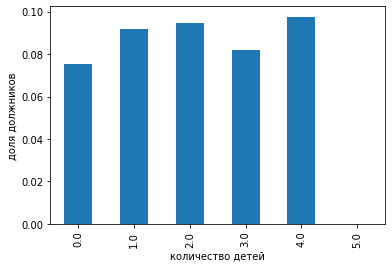

In [48]:
debt_per_cat1['debt_ratio'].plot.bar(xlabel='количество детей', ylabel='доля должников') # смотрим график

Наблюдается незначительное повышение частоты невозврата кредита в срок при увеличении числа детей. Возможно это связано с тем, что дети – значительный источник расходов, и увеличение их числа повышает финансовую нагрузку.

#### Вопрос 2: Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [49]:
debt_per_cat2 = df.pivot_table(index=['family_status_id'],  values='debt', aggfunc=['sum', 'count']) # таблица с количеством 
                                                                               # должников и семейным положением
debt_per_cat2 = debt_per_cat2.set_axis(['debtors', 'count'], axis=1, inplace=False) # переименовываем столбцы
debt_per_cat2['debt_ratio'] = debt_per_cat2['debtors'] / debt_per_cat2['count'] # считаем соотношение должников и общего числа
                                                                               # клиентов с данным  семейным положением
debt_per_cat2 = family_dict.merge(debt_per_cat2, on='family_status_id', how='left') # обогащаем таблицу текстовыми значениями 
                                                                               # семейного положения
debt_per_cat2

,family_status,family_status_id,debtors,count,debt_ratio
0,женат / замужем,0,931,12344,0.075421
1,гражданский брак,1,388,4162,0.093224
2,вдовец / вдова,2,63,959,0.065693
3,в разводе,3,85,1195,0.071130
4,Не женат / не замужем,4,274,2810,0.097509


<AxesSubplot:xlabel='[женат / замужем, гражданский брак, вдовец / вдова, в разводе, Не женат / не замужем]', ylabel='доля должников'>

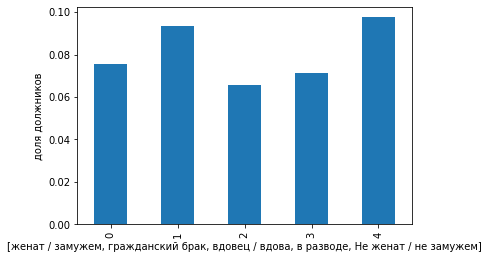

In [50]:
debt_per_cat2['debt_ratio'].plot.bar(xlabel = debt_per_cat2['family_status'], ylabel='доля должников') # смотрим график

Наблюдается заметное повышение частоты невозврата кредита в категориях "гражданский брак" и "не женат/не замужем". Возможно это связано с тем, что в семье вырабатывается более строгая финансовая дисциплина, привычка к которой сохраняется даже во вдовстве и разводе.

#### Вопрос 3: Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [51]:
debt_per_cat3 = df.pivot_table(index=['total_income_category'],  values='debt', aggfunc=['sum', 'count']) # таблица с количеством 
                                                                               # должников и уровнем дохода
debt_per_cat3 = debt_per_cat3.set_axis(['debtors', 'count'], axis=1, inplace=False) # переименовываем столбцы
debt_per_cat3['debt_ratio'] = debt_per_cat3['debtors'] / debt_per_cat3['count'] # считаем соотношение должников и общего числа
                                                                               # клиентов с данным  уровнем дохода 
debt_per_cat3['income_cat'] = ['0–30000', '30001–50000', '50001–200000', '200001–1000000',  'выше 1000001'] # обогащаем таблицу 
                                                                               # текстовыми значениями уровня дохода 
debt_per_cat3

,debtors,count,debt_ratio,income_cat
total_income_category,,,,
A,2,25,0.080000,0–30000
B,356,5041,0.070621,30001–50000
C,1360,16032,0.084830,50001–200000
D,21,350,0.060000,200001–1000000
E,2,22,0.090909,выше 1000001


<AxesSubplot:xlabel='[0–30000, 30001–50000, 50001–200000, 200001–1000000, выше 1000001]', ylabel='доля должников'>

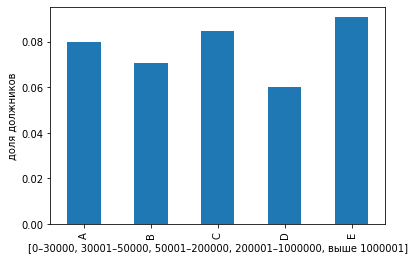

In [52]:
debt_per_cat3['debt_ratio'].plot.bar(xlabel = debt_per_cat3['income_cat'], ylabel='доля должников') # смотрим график

Четкая зависимость между уровнем дохода и возвратом кредита в срок не наблюдается. Большее число невозвратов в группе с высокими доходами, скорее всего объясняется тем, что члены этой группы привыкли к соответственно высоким расходам, что ухудшает финансовую дисциплину.

#### Вопрос 4: Как разные цели кредита влияют на его возврат в срок?

In [53]:
debt_per_cat4 = df.pivot_table(index=['purpose_category'],  values='debt', aggfunc=['sum', 'count']) # таблица с количеством 
                                                                               # должников и уровнем дохода
debt_per_cat4 = debt_per_cat4.set_axis(['debtors', 'count'], axis=1, inplace=False) # переименовываем столбцы
debt_per_cat4['debt_ratio'] = debt_per_cat4['debtors'] / debt_per_cat4['count'] # считаем соотношение должников и общего числа
                                                                               # клиентов с данным  уровнем дохода 
debt_per_cat4

,debtors,count,debt_ratio
purpose_category,,,
операции с автомобилем,403,4308,0.093547
операции с недвижимостью,782,10814,0.072314
получение образования,370,4014,0.092177
проведение свадьбы,186,2334,0.079692


<AxesSubplot:xlabel='цели кредита', ylabel='доля должников'>

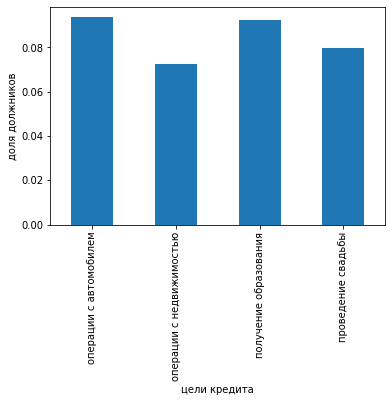

In [54]:
debt_per_cat4['debt_ratio'].plot.bar(xlabel='цели кредита',ylabel='доля должников') # смотрим график

Самые рискованные кредиты — на операции с автомобилем и получение образования. Низкая надежность заемщиков по автокредитам возможно объясняется тем, что в современном обществе автомобиль рассматривается как вешь первой необходимости, и для его получения многие готовы брать кредит, не оценивая возможность погашения. Кредиты на образование берут как правило молодые люди, с нестабильными и низкими доходами и низкой финансовой дисциплиной, что влияет на высокую долю невозвратов в срок. Покупка недвижимости - очень крупная операция, совершая которую заемщики заранее оценивают свою способность погасить кредит, а длительный срок погашения таких кредитов вырабатывает финансовую дисциплину, поэтому нарушения по этой группе кредитов менее частые.

In [55]:
debt_per_cat4 = df.pivot_table(index=['purpose_category'],  values='debt', aggfunc=['sum', 'count', 'mean']) # таблица с количеством 
                                                                               # должников и уровнем дохода
debt_per_cat4 = debt_per_cat4.set_axis(['debtors', 'count', 'debt_ratio'], axis=1, inplace=False) # переименовываем столбцы
debt_per_cat4

,debtors,count,debt_ratio
purpose_category,,,
операции с автомобилем,403,4308,0.093547
операции с недвижимостью,782,10814,0.072314
получение образования,370,4014,0.092177
проведение свадьбы,186,2334,0.079692


Проверим предположение, что на образование кредиты берут более молодые люди.

In [56]:
df['dob_years'][df['purpose_category'] == 'получение образования'].describe() # посчитаем статистические характеристики
                                                                              # возраста заемщиков на образование

count    4014.000000
mean       43.595914
std        12.322101
min        19.000000
25%        34.000000
50%        42.000000
75%        54.000000
max        75.000000
Name: dob_years, dtype: float64

In [57]:
df['dob_years'][df['purpose_category'] == 'операции с автомобилем'].describe() # посчитаем статистические характеристики
                                                                               # возраста заемщиков на автомобиль

count    4308.000000
mean       43.691736
std        12.199836
min        19.000000
25%        34.000000
50%        43.000000
75%        54.000000
max        74.000000
Name: dob_years, dtype: float64

Предположение не подтвердилось, характеристики возраста для заемщиков по обоим видам кредитов очень похожи. Возможно причина высокой доли невозвратов по образовательным кредитам в том, что сумма кредита на образование меньше, и к ее возврату относятся менее ответственно.

### Выводы

#### Вывод 1: 
Есть слабая зависимость частоты невозврата кредита в срок при увеличении числа детей. 

#### Вывод 2:
Частота невозврата кредита в срок выше для холостых и находящихся в гражданском браке. 

#### Вывод 3: 
Зависимость невозврата кредита в срок от уровня дохода не установлена.

#### Вывод 4: 
По кредитам на операции с автомобилем и получение образования выше частота невозвратов в срок. 

## Общий вывод:

Нами проанализированы предоставленные заказчиком данные о платёжеспособности клиентов.<BR><BR>
В ходе исследования были даны ответы на следующие вопросы:
* Есть ли зависимость между количеством детей и возвратом кредита в срок?
* Есть ли зависимость между семейным положением и возвратом кредита в срок?
* Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
* Как разные цели кредита влияют на его возврат в срок?<BR><BR>
Были установленны следующие зависимости характеристик клиентов и кредита на факт погашения кредита в срок:<BR>
* Частота невозврата кредита в срок при увеличении числа детей повышается.
* Частота невозврата кредита в срок выше для холостых и находящихся в гражданском браке.
* Частота невозврата кредита в срок выше по кредитам на операции с автомобилем и получение образования.<BR><BR>
Зависимость невозврата кредита в срок от уровня дохода не установлена.<BR><BR>
Рекомендации:<BR>
При построении модели кредитного скоринга использовать вышеуказанные зависимости.

Во время предобработки данных выявлены следующие проблемы с исходными данными:
1. В столбцах `days_employed` и `total_income` есть пропуски, которые совпадают по столбцам. Похоже, что клиенты без информации о времени работы и доходе — либо неработающие (пенсионер), либо сотрудники (или компаний клиентов, или самого банка).
2. В столбцах `children` и `days_employed` найдены отрицательные значения, не имеющие физического смысла. Возможно, это вызвано опечаткой при внесении данных вручную. Также в  столбце `children`  найдено несколько значений `20`. Это похоже на ошибку.
3. В столбце `dob_years` есть строки с нулевым возрастом. Очевидно это ошибка.
4. Отсутствие уникального ID клиента вызвало проблемы с поиском явных дубликатов. Не ясно, вызвано ли дублирование ошибкой, или у разных клиентов действительно совпадают приведенные в параметрах данные.
5. В столбце `education` есть совпадающие категории, которые могут быть унифицированы изменением регистра.